In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv("c:/Users/sidha/Downloads/Active_Final_Clean_Merged_for_Team.csv")

# Data Preprocessing
# Drop redundant records
data.drop_duplicates(inplace=True)

# Convert categorical variables to numerical format
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

# Set the variable "Success" based on the conditions
data['Success'] = data.apply(lambda row: 1 if row['Assessment Type'] == 'Quarterly' and row['Scaled TIMES Score'] > 60 else 0, axis=1)

# Select relevant features for regression analysis
features = ['Gender', 'Sense of Power', 'Values', 'Relationships', 'Self Awareness', 'Number of Service Enrolled', 'Success']

# Create a new dataframe with selected features
df = data[features]

# Handling missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df.drop('Success', axis=1))
df_imputed = pd.DataFrame(X_imputed, columns=df.columns[:-1])  # Remove '-1' to include all columns
df_imputed['Success'] = df['Success']

# Split data into features (X) and target variable (y)
X = df_imputed.drop('Success', axis=1)
y = df_imputed['Success']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualization
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Plotting the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Success', data=df_imputed)
plt.title("Distribution of Success")
plt.show()


c:\Users\sidha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['Gender']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Shape of passed values is (1729, 5), indices imply (1729, 6)

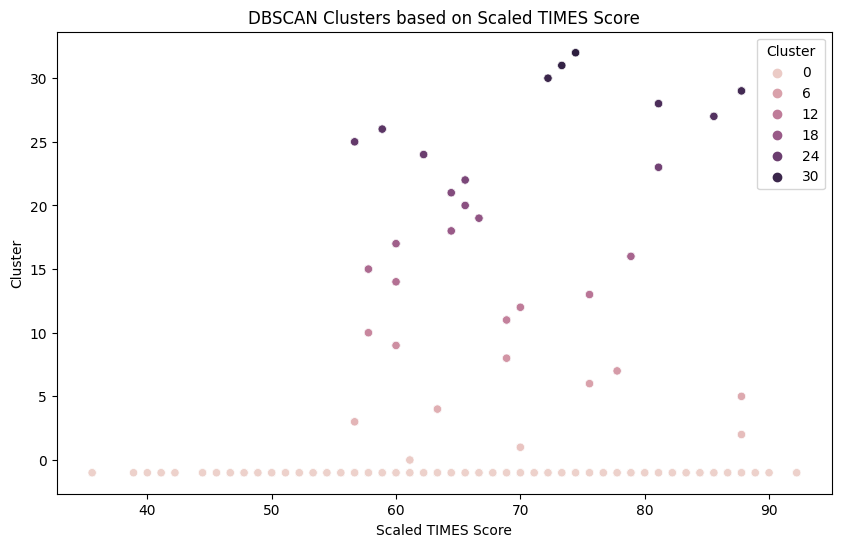

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 51, ncost: 18910.926833035937
Run: 1, iteration: 2/100, moves: 28, ncost: 18732.7350645091
Run: 1, iteration: 3/100, moves: 14, ncost: 18700.14372753735
Run: 1, iteration: 4/100, moves: 8, ncost: 18682.01366474012
Run: 1, iteration: 5/100, moves: 4, ncost: 18677.050633652612
Run: 1, iteration: 6/100, moves: 3, ncost: 18675.337026084766
Run: 1, iteration: 7/100, moves: 1, ncost: 18675.06338185554
Run: 1, iteration: 8/100, moves: 0, ncost: 18675.06338185554
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 244, ncost: 20023.572696820625
Run: 2, iteration: 2/100, moves: 103, ncost: 18801.214922095347
Run: 2, iteration: 3/100, moves: 34, ncost: 18634.734858303666
Run: 2, iteration: 4/100, moves: 16, ncost: 18590.120854797126
Run: 2, iteration

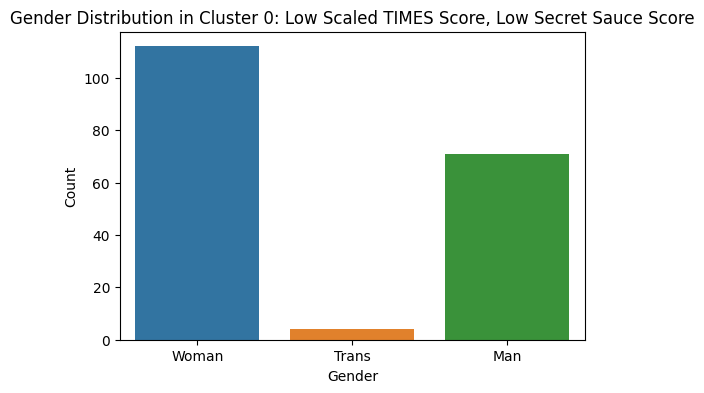

Cluster 1: High Scaled TIMES Score, Low Secret Sauce Score
Gender Distribution:
Gender
Woman         162
Man            91
Non-Binary      6
Trans           1
Name: count, dtype: int64




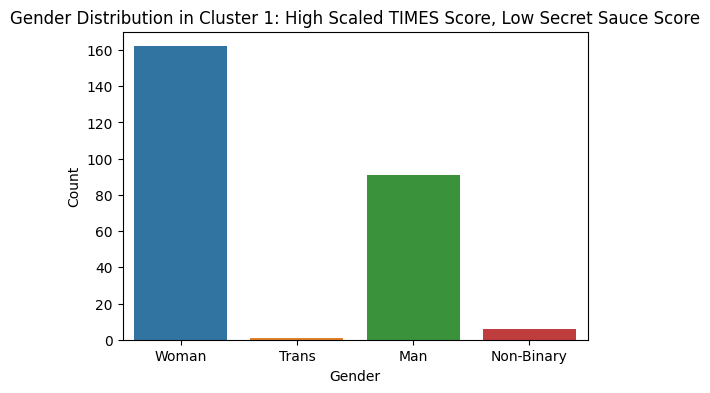

Cluster 2: Low Scaled TIMES Score, High Secret Sauce Score
Gender Distribution:
Gender
Woman         215
Man            70
Non-Binary     10
Name: count, dtype: int64




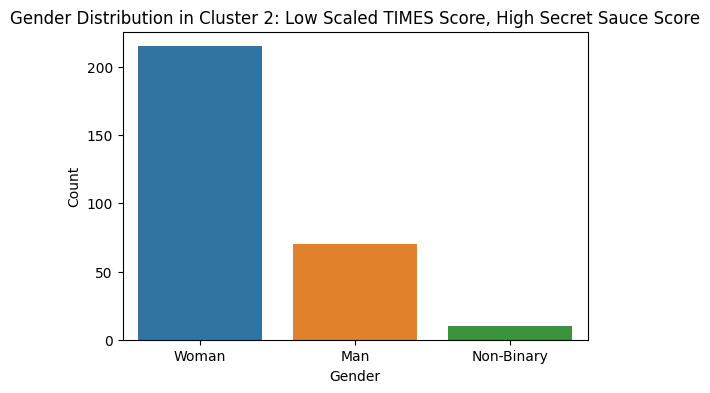

Cluster 3: High Scaled TIMES Score, High Secret Sauce Score
Gender Distribution:
Gender
Woman         88
Man           28
Non-Binary     2
Name: count, dtype: int64




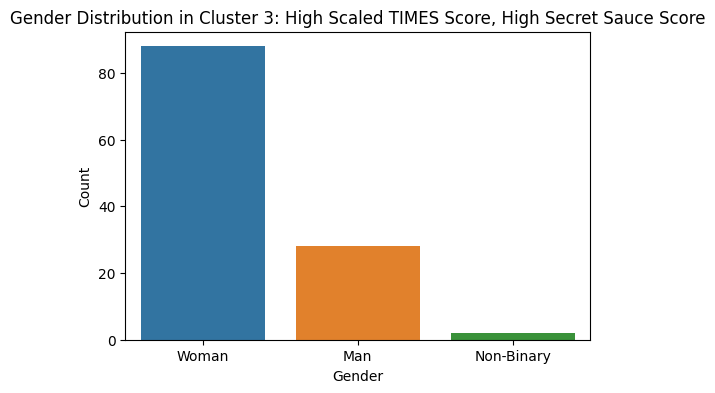

In [3]:
from kmodes.kprototypes import KPrototypes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("c:/Users/sidha/Downloads/Active_Final_Clean_Merged_for_Team.csv")  # Replace 'your_dataset.csv' with your actual dataset filename

# Drop duplicated rows
data.drop_duplicates(inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Select relevant features for clustering
numerical_features = ['Scaled TIMES Score']
categorical_features = ['Values', 'Self Awareness', 'Sense of Power', 'Relationships']

# Combine numerical and categorical features
X = data[numerical_features + categorical_features]

# Initialize KPrototypes object
kproto = KPrototypes(n_clusters=4, verbose=2)  # Adjust number of clusters as needed

# Fit the model
clusters = kproto.fit_predict(X, categorical=[1, 2, 3, 4])

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Define cluster names based on the desired characteristics
cluster_names = {
    0: "Low Scaled TIMES Score, Low Secret Sauce Score",
    1: "High Scaled TIMES Score, Low Secret Sauce Score",
    2: "Low Scaled TIMES Score, High Secret Sauce Score",
    3: "High Scaled TIMES Score, High Secret Sauce Score"
}

# Print out characteristics of each cluster
for cluster_id, cluster_name in cluster_names.items():
    print(f"Cluster {cluster_id}: {cluster_name}")
    cluster_data = data[data['Cluster'] == cluster_id]
    gender_distribution = cluster_data['Gender'].value_counts()
    print("Gender Distribution:")
    print(gender_distribution)
    print("\n")

    # Visualize gender distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Gender', data=cluster_data)
    plt.title(f"Gender Distribution in Cluster {cluster_id}: {cluster_name}")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 86, ncost: 19388.581015720145
Run: 1, iteration: 2/100, moves: 25, ncost: 19226.318853579447
Run: 1, iteration: 3/100, moves: 32, ncost: 19046.90307596369
Run: 1, iteration: 4/100, moves: 32, ncost: 18897.1503451547
Run: 1, iteration: 5/100, moves: 24, ncost: 18705.73432749043
Run: 1, iteration: 6/100, moves: 18, ncost: 18649.875313223492
Run: 1, iteration: 7/100, moves: 18, ncost: 18597.689502345373
Run: 1, iteration: 8/100, moves: 4, ncost: 18589.995337556677
Run: 1, iteration: 9/100, moves: 0, ncost: 18589.995337556677
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 237, ncost: 23084.056032809953
Run: 2, iteration: 2/100, moves: 129, ncost: 20313.156876290468
Run: 2, iteration: 3/100, moves: 88, ncost: 19096.68043899567
Run: 2, itera

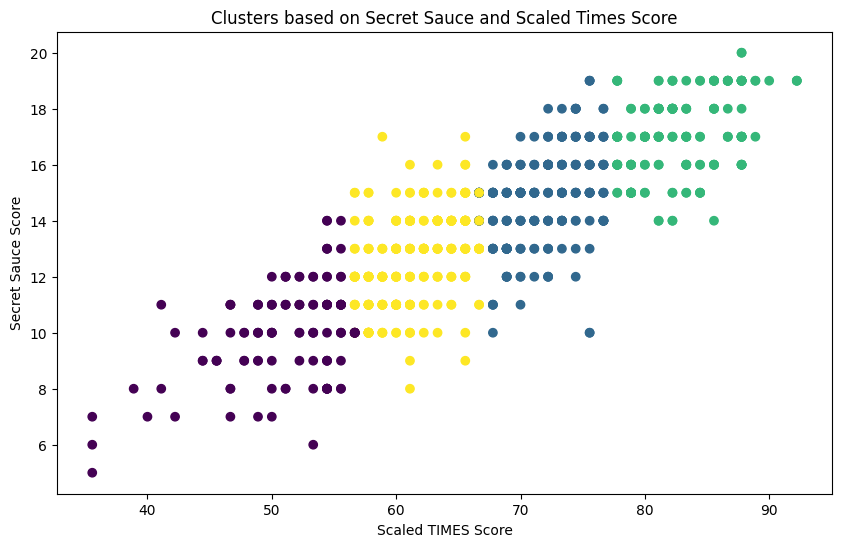

Cluster 0: Low Scaled Times Score, Low Secret Sauce Score
Cluster 1: High Scaled Times Score, Low Secret Sauce Score
Cluster 2: Low Scaled Times Score, High Secret Sauce Score
Cluster 3: High Scaled Times Score, High Secret Sauce Score


In [59]:
from kmodes.kprototypes import KPrototypes
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("c:/Users/sidha/Downloads/Active_Final_Clean_Merged_for_Team.csv")  # Replace 'your_dataset.csv' with your actual dataset filename

# Drop duplicated rows
data.drop_duplicates(inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Define the thresholds for scaled times score and secret sauce score
scaled_times_score_thresholds = {'low': (0, 30), 'high': (60, 100)}
secret_sauce_thresholds = {'low': (0, 7), 'high': (13, 20)}

# Define numerical and categorical features
numerical_features = ['Scaled TIMES Score']
categorical_features = ['Values', 'Self Awareness', 'Sense of Power', 'Relationships']

# Combine numerical and categorical features
X = data[numerical_features + categorical_features]

# Assign cluster labels based on the thresholds
def assign_cluster_label(row):
    scaled_times_score_label = None
    secret_sauce_label = None
    
    # Assign label for scaled times score
    for label, (low, high) in scaled_times_score_thresholds.items():
        if low <= row['Scaled TIMES Score'] <= high:
            scaled_times_score_label = label
            break
    
    # Calculate secret sauce score
    secret_sauce_score = row['Values'] + row['Self Awareness'] + row['Sense of Power'] + row['Relationships']
    
    # Assign label for secret sauce score
    for label, (low, high) in secret_sauce_thresholds.items():
        if low <= secret_sauce_score <= high:
            secret_sauce_label = label
            break
    
    # Combine labels to form cluster label
    if scaled_times_score_label == 'low' and secret_sauce_label == 'low':
        return 'Low Scaled Times Score, Low Secret Sauce Score'
    elif scaled_times_score_label == 'high' and secret_sauce_label == 'low':
        return 'High Scaled Times Score, Low Secret Sauce Score'
    elif scaled_times_score_label == 'low' and secret_sauce_label == 'high':
        return 'Low Scaled Times Score, High Secret Sauce Score'
    elif scaled_times_score_label == 'high' and secret_sauce_label == 'high':
        return 'High Scaled Times Score, High Secret Sauce Score'
    else:
        return 'Unknown'

# Initialize KPrototypes object
kproto = KPrototypes(n_clusters=4, verbose=2)  # Adjust number of clusters as needed

# Fit the model
clusters = kproto.fit_predict(X.values, categorical=[1, 2, 3, 4])

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Scaled TIMES Score'], data['Values'] + data['Self Awareness'] + data['Sense of Power'] + data['Relationships'], c=clusters, cmap='viridis')
plt.title('Clusters based on Secret Sauce and Scaled Times Score')
plt.xlabel('Scaled TIMES Score')
plt.ylabel('Secret Sauce Score')
plt.show()

# Print the cluster names
cluster_names = {
    0: 'Low Scaled Times Score, Low Secret Sauce Score',
    1: 'High Scaled Times Score, Low Secret Sauce Score',
    2: 'Low Scaled Times Score, High Secret Sauce Score',
    3: 'High Scaled Times Score, High Secret Sauce Score'
}

for cluster_num, cluster_name in cluster_names.items():
    print(f"Cluster {cluster_num}: {cluster_name}")


<Figure size 1000x500 with 0 Axes>

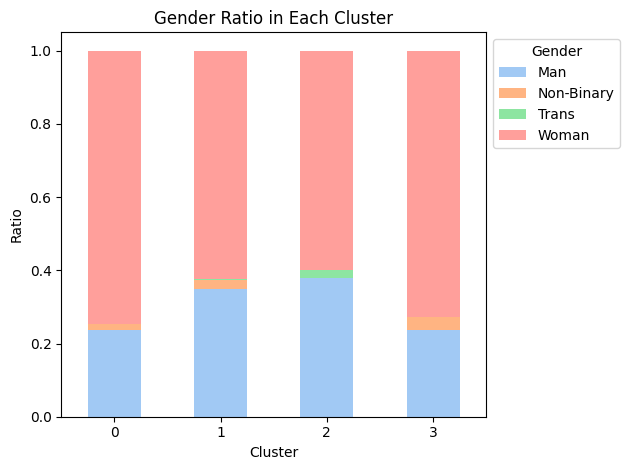

<Figure size 1000x500 with 0 Axes>

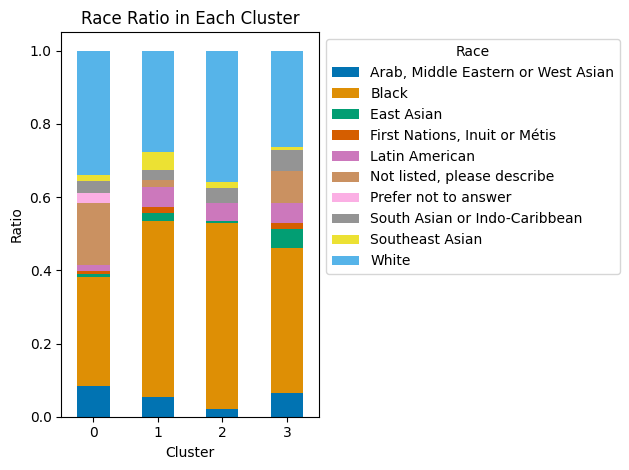

<Figure size 1000x500 with 0 Axes>

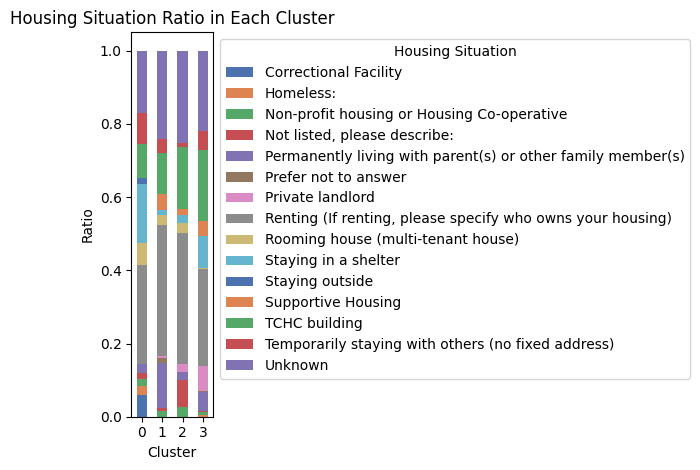

Cluster 0: Low Scaled Times Score, Low Secret Sauce Score
Cluster 1: High Scaled Times Score, Low Secret Sauce Score
Cluster 2: Low Scaled Times Score, High Secret Sauce Score
Cluster 3: High Scaled Times Score, High Secret Sauce Score


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Assuming your dataset is stored in a variable named 'data'

# Group data by cluster and gender, race, and housing situation
gender_ratio = data.groupby(['Cluster', 'Gender']).size().unstack()
race_ratio = data.groupby(['Cluster', 'Race']).size().unstack()
housing_ratio = data.groupby(['Cluster', 'Housing Situation']).size().unstack()

# Calculate the ratio of each category within each cluster
gender_ratio = gender_ratio.div(gender_ratio.sum(axis=1), axis=0)
race_ratio = race_ratio.div(race_ratio.sum(axis=1), axis=0)
housing_ratio = housing_ratio.div(housing_ratio.sum(axis=1), axis=0)

# Define cluster names
cluster_names = {
    0: 'Low Scaled Times Score, Low Secret Sauce Score',
    1: 'High Scaled Times Score, Low Secret Sauce Score',
    2: 'Low Scaled Times Score, High Secret Sauce Score',
    3: 'High Scaled Times Score, High Secret Sauce Score'
}

# Plot bar plots for gender ratio
plt.figure(figsize=(10, 5))
sns.set_palette("pastel")
ax1 = gender_ratio.plot(kind='bar', stacked=True)
plt.title('Gender Ratio in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ratio')
plt.legend(title='Gender', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot bar plots for race ratio
plt.figure(figsize=(10, 5))
sns.set_palette("colorblind")
ax2 = race_ratio.plot(kind='bar', stacked=True)
plt.title('Race Ratio in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ratio')
plt.legend(title='Race', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot bar plots for housing situation ratio
plt.figure(figsize=(10, 5))
sns.set_palette("deep")
ax3 = housing_ratio.plot(kind='bar', stacked=True)
plt.title('Housing Situation Ratio in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ratio')
plt.legend(title='Housing Situation', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print cluster names
for cluster, name in cluster_names.items():
    print(f'Cluster {cluster}: {name}')


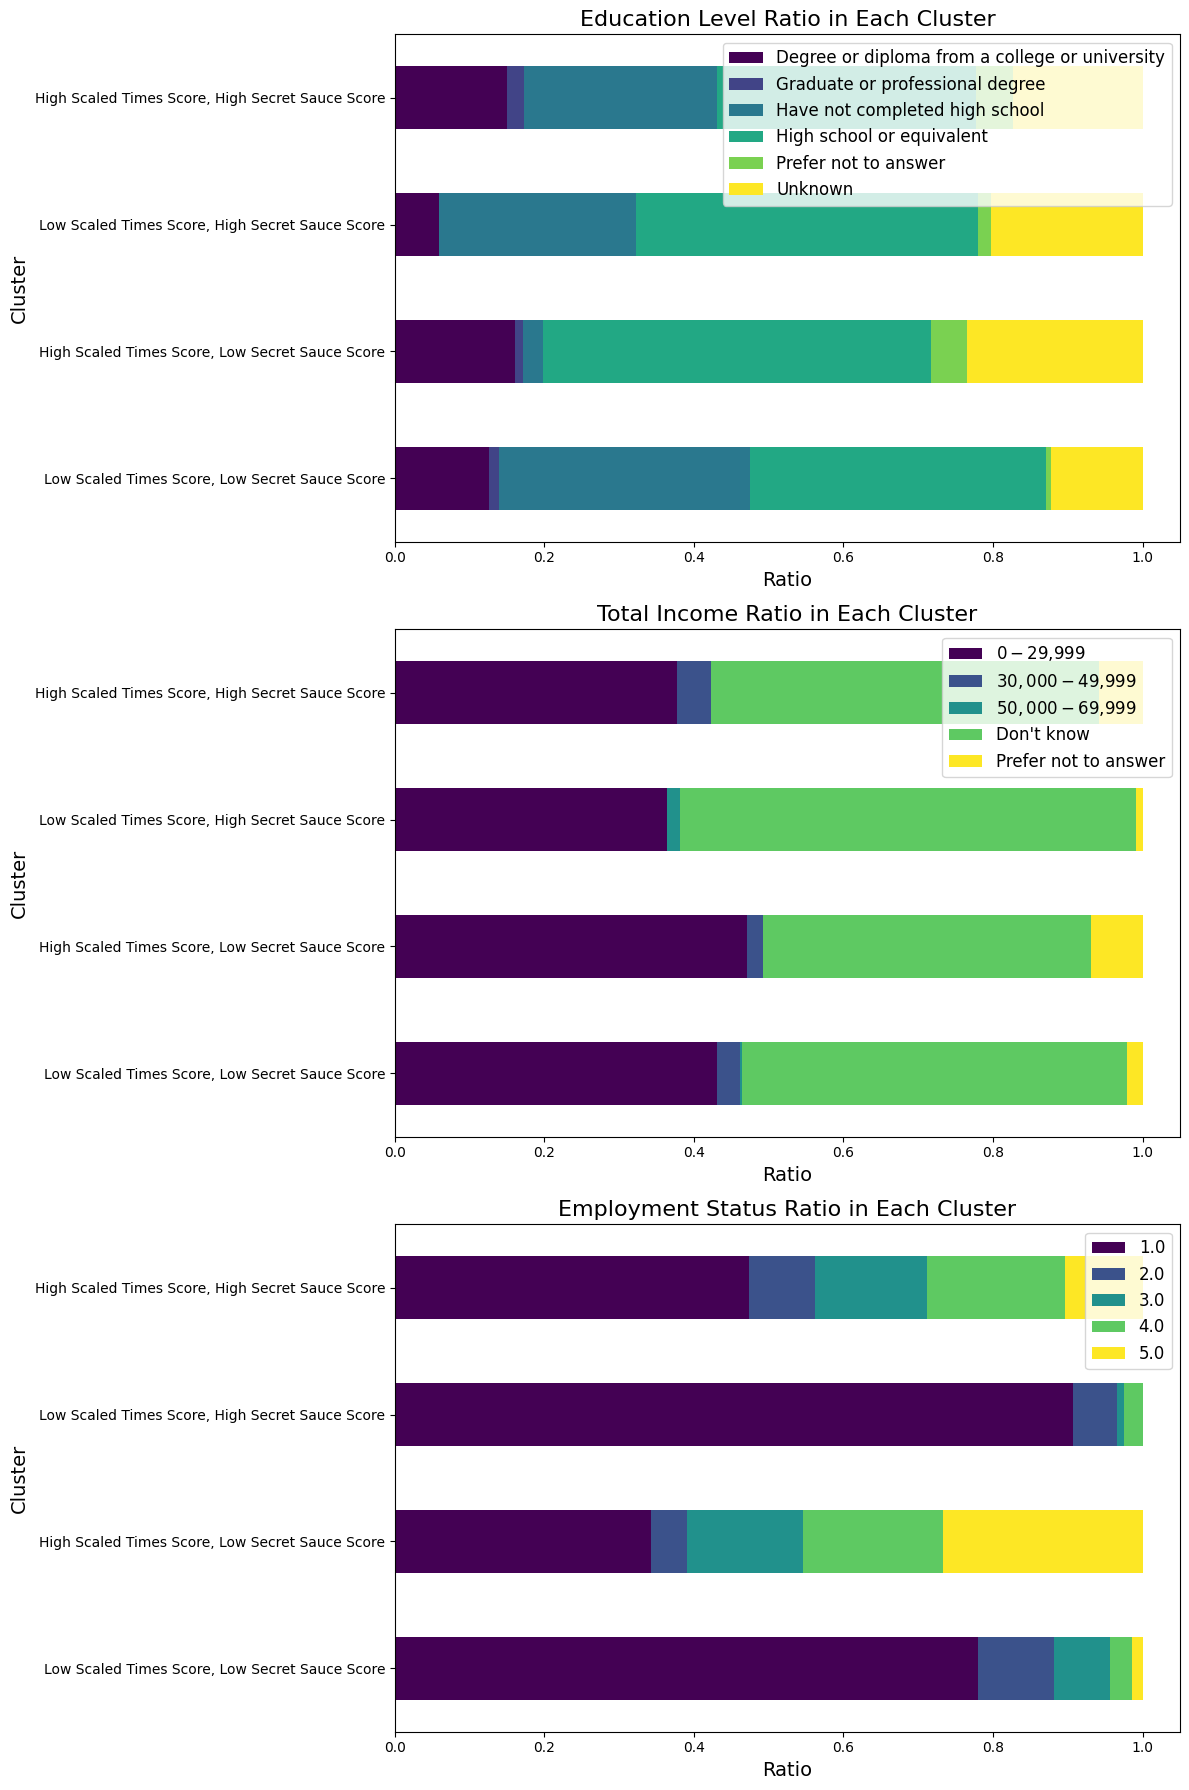

In [40]:
# Plotting additional insights with improved appearance
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot bar plots for education level ratio
education_ratio.rename(index=cluster_names).plot(kind='barh', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Education Level Ratio in Each Cluster', fontsize=16)
axes[0].set_xlabel('Ratio', fontsize=14)
axes[0].set_ylabel('Cluster', fontsize=14)
axes[0].legend(fontsize=12, loc='upper right')

# Plot bar plots for total income ratio
income_ratio.rename(index=cluster_names).plot(kind='barh', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Total Income Ratio in Each Cluster', fontsize=16)
axes[1].set_xlabel('Ratio', fontsize=14)
axes[1].set_ylabel('Cluster', fontsize=14)
axes[1].legend(fontsize=12, loc='upper right')

# Plot bar plots for employment status ratio
employment_status_ratio.rename(index=cluster_names).plot(kind='barh', stacked=True, ax=axes[2], colormap='viridis')
axes[2].set_title('Employment Status Ratio in Each Cluster', fontsize=16)
axes[2].set_xlabel('Ratio', fontsize=14)
axes[2].set_ylabel('Cluster', fontsize=14)
axes[2].legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()



Cluster Success Prediction:
Cluster
0    0
1    1
2    1
3    1
Name: Success, dtype: int32


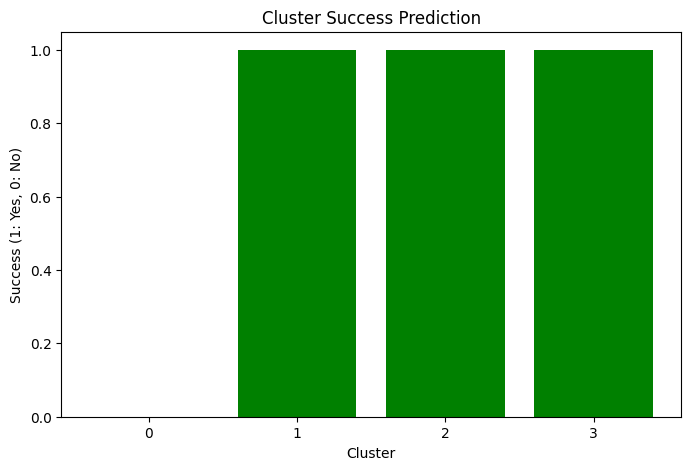

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load your dataset
# Assuming your dataset is stored in a variable named 'data'

# Step 1: Identify the latest record for each ID
latest_records = data.sort_values('Assessment Completed Date').groupby('Participant Id').last().reset_index()

# Step 2: Check if Scaled TIMES Score is more than 60 for the latest record
latest_records['Success'] = (latest_records['Scaled TIMES Score'] > 60).astype(int)

# Step 3: Merge the success column back to the original data
data = pd.merge(data, latest_records[['Participant Id', 'Success']], on='Participant Id', how='left')

# Step 4: Group the data by cluster and predict if each cluster will succeed
cluster_success = data.groupby('Cluster')['Success'].mean()
cluster_success = (cluster_success > 0.5).astype(int)

# Step 5: Print cluster success prediction
print("Cluster Success Prediction:")
print(cluster_success)

# Visualize the cluster success prediction
plt.figure(figsize=(8, 5))
plt.bar(cluster_success.index, cluster_success.values, color=['red' if val == 0 else 'green' for val in cluster_success.values])
plt.title('Cluster Success Prediction')
plt.xlabel('Cluster')
plt.ylabel('Success (1: Yes, 0: No)')
plt.xticks(cluster_success.index)
plt.show()


ValueError: With n_samples=0, test_size=0.05 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

Random Forest Model:
Accuracy: 0.9761904761904762
ROC AUC Score: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      1.00      0.99        41

    accuracy                           0.98        42
   macro avg       0.49      0.50      0.49        42
weighted avg       0.95      0.98      0.96        42



c:\Users\sidha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sidha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sidha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

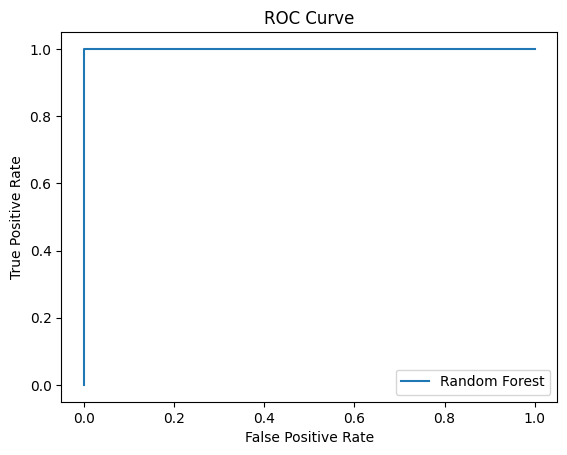


Support Vector Machine (SVM) Model:
Accuracy: 1.0
ROC AUC Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        41

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



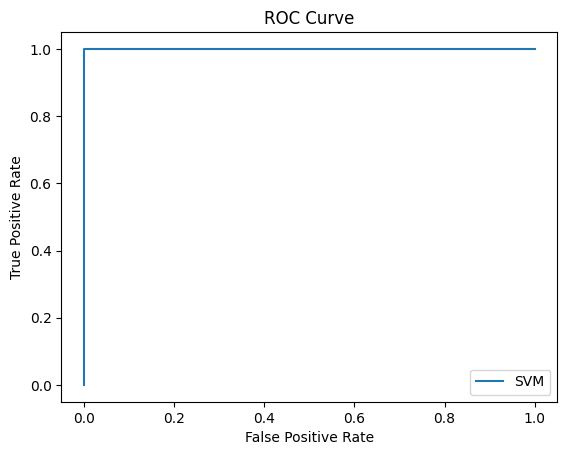

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame containing your dataset

# Step 1: Identify the last assessment record for each participant
last_assessment = data.groupby('Participant Id').last().reset_index()

# Step 2: Label success based on TIMES score
last_assessment['Success'] = (last_assessment['Scaled TIMES Score'] >= 40).astype(int)

# Step 3: Split the Dataset
X = last_assessment[['Age', 'TIMES Total Scores']]  # Features
y = last_assessment['Success']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Selection - Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Model Evaluation - Random Forest
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_y_pred)

print("Random Forest Model:")
print("Accuracy:", rf_accuracy)
print("ROC AUC Score:", rf_roc_auc)
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Visualize ROC curve for Random Forest
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred_proba)
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Step 6: Model Selection - Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Step 7: Model Evaluation - SVM
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_roc_auc = roc_auc_score(y_test, svm_y_pred)

print("\nSupport Vector Machine (SVM) Model:")
print("Accuracy:", svm_accuracy)
print("ROC AUC Score:", svm_roc_auc)
print("Classification Report:")
print(classification_report(y_test, svm_y_pred))

# Visualize ROC curve for SVM
svm_y_pred_proba = svm_model.predict_proba(X_test)[:, 1]
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_pred_proba)
plt.plot(svm_fpr, svm_tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [1]:
from imblearn.over_sampling import SMOTE

# Step 1: Check distribution of target variable
print(data['Success'].value_counts())

# Step 2: Handle data imbalance using SMOTE
if len(data['Success'].unique()) == 1:
    print("Error: Only one class present in the target variable.")
else:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Step 3: Split the resampled data
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Step 4: Fit the SVM model
    model = SVC(kernel='rbf', C=1.0, gamma='scale')
    model.fit(X_train, y_train)

    # Step 5: Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print("Support Vector Machine (SVM) Model:")
    print("Accuracy:", accuracy)
    print("ROC AUC Score:", roc_auc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


NameError: name 'data' is not defined

In [54]:
print(data['Success'].value_counts())

KeyError: 'Success'

Insights for LOW SCALED TIMES SCORE and LOW SCORES IN SECRET SAUCE SCORE:

Addiction Distribution:
Series([], Name: proportion, dtype: float64)


IndexError: index 0 is out of bounds for axis 0 with size 0

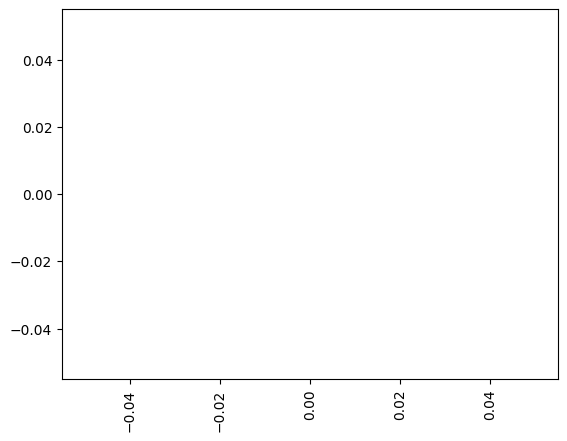

In [42]:
# Filter the dataset based on clustering results
# Assuming 'Cluster' column contains the cluster labels
cluster_1 = data[data['Cluster'] == 'LOW SCALED TIMES SCORE and LOW SCORES IN SECRET SAUCE SCORE']
cluster_2 = data[data['Cluster'] == 'HIGH SCALED TIMES SCORE and LOW SCORES IN SECRET SAUCE']
cluster_3 = data[data['Cluster'] == 'LOW SCALED TIMES SCORE and HIGH SCORE IN SECRET SAUCE']
cluster_4 = data[data['Cluster'] == 'HIGH SCALED TIMES SCORE and HIGH SCORES IN SECRET SAUCE']

# Define function to generate insights and charts
def generate_insights(cluster_data, cluster_name):
    print(f"Insights for {cluster_name}:")
    
    # Additional indicators
    additional_indicators = ['Addiction', 'Family Structural Stability', 'System Navigation', 
                             'Employment Readiness', 'Employment Status', 'Economic Judgement', 
                             'Economic Stability', 'Certification/Skills', 'Shelter', 'Safety', 
                             'Nutrition', 'Health', 'Mental Health', 'Spirituality']
    
    for indicator in additional_indicators:
        # Calculate indicator distribution
        indicator_counts = cluster_data[indicator].value_counts(normalize=True)
        
        # Plot distribution
        print(f"\n{indicator} Distribution:")
        print(indicator_counts)
        indicator_counts.plot(kind='bar')
        plt.title(f"{indicator} Distribution for {cluster_name}")
        plt.xlabel(indicator)
        plt.ylabel("Percentage")
        plt.show()

# Generate insights and charts for each cluster
generate_insights(cluster_1, "LOW SCALED TIMES SCORE and LOW SCORES IN SECRET SAUCE SCORE")
generate_insights(cluster_2, "HIGH SCALED TIMES SCORE and LOW SCORES IN SECRET SAUCE")
generate_insights(cluster_3, "LOW SCALED TIMES SCORE and HIGH SCORE IN SECRET SAUCE")
generate_insights(cluster_4, "HIGH SCALED TIMES SCORE and HIGH SCORES IN SECRET SAUCE")


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset based on clustering results
# Assuming 'Cluster' column contains the cluster labels
cluster_1 = data[data['Cluster'] == 'LOW SCALED TIMES SCORE and LOW SCORES IN SECRET SAUCE SCORE']
cluster_2 = data[data['Cluster'] == 'HIGH SCALED TIMES SCORE and LOW SCORES IN SECRET SAUCE']
cluster_3 = data[data['Cluster'] == 'LOW SCALED TIMES SCORE and HIGH SCORE IN SECRET SAUCE']
cluster_4 = data[data['Cluster'] == 'HIGH SCALED TIMES SCORE and HIGH SCORES IN SECRET SAUCE']

# Define function to generate insights and charts
def generate_insights(cluster_data, cluster_name):
    print(f"Insights for {cluster_name}:")
    
    # Additional indicators
    additional_indicators = ['Addiction', 'Family Structural Stability', 'System Navigation', 
                             'Employment Readiness', 'Employment Status', 'Economic Judgement', 
                             'Economic Stability', 'Certification/Skills', 'Shelter', 'Safety', 
                             'Nutrition', 'Health', 'Mental Health', 'Spirituality']
    
    for indicator in additional_indicators:
        # Calculate indicator distribution
        indicator_counts = cluster_data[indicator].value_counts(normalize=True)
        
        # Check if the indicator distribution is empty
        if not indicator_counts.empty:
            # Plot distribution
            print(f"\n{indicator} Distribution:")
            print(indicator_counts)
            indicator_counts.plot(kind='bar')
            plt.title(f"{indicator} Distribution for {cluster_name}")
            plt.xlabel(indicator)
            plt.ylabel("Percentage")
            plt.show()
        else:
            print(f"\n{indicator} Distribution is empty for {cluster_name}")

# Generate insights and charts for each cluster
generate_insights(cluster_1, "LOW SCALED TIMES SCORE and LOW SCORES IN SECRET SAUCE SCORE")
generate_insights(cluster_2, "HIGH SCALED TIMES SCORE and LOW SCORES IN SECRET SAUCE")
generate_insights(cluster_3, "LOW SCALED TIMES SCORE and HIGH SCORE IN SECRET SAUCE")
generate_insights(cluster_4, "HIGH SCALED TIMES SCORE and HIGH SCORES IN SECRET SAUCE")


KeyError: 'Cluster'